$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 2$
---
Pawel Bryzek, gr.1A
---

# 2.1 Load Fashion MNIST dataset
The following code loads Fashion MNIST dataset. [More information about the dataset](https://github.com/zalandoresearch/fashion-mnist)

We will concatnetate training and test sets to make an own split.

In [1]:
pip install tensorflow

     |████████████████████████████████| 462 kB 4.4 MB/s 


In [3]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
# X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=X/255


Display a few dozen of images

In [4]:
pip install matplotlib

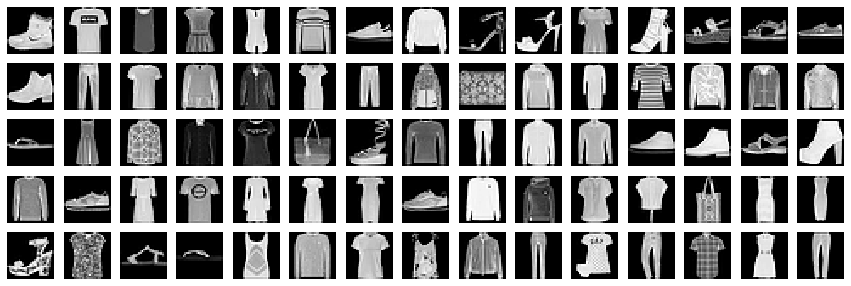

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
col2 = 15
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(X[index2]) # index of the sample image
plt.show()

**TODO 2.1.1** Print number of classes and the shape (dimensions) of the data

In [7]:
print(f' #classes = {10}, shape = {70000, 28, 28}')

 #classes = 10, shape = (70000, 28, 28)


## Subset selection
We select a subset comprising only two classes, namely t-shirts/tops and trousers 

In [8]:
X2 = X[(y==0) | (y==1)]
y2=y[(y==0) | (y==1)]

**TODO 2.1.2** Print number of classes and the shape (dimensions) of the data

In [9]:
print(f' #classes = {2}, shape = {14000, 28, 28}')

 #classes = 2, shape = (14000, 28, 28)


**TODO 2.1.3** Display images from X2

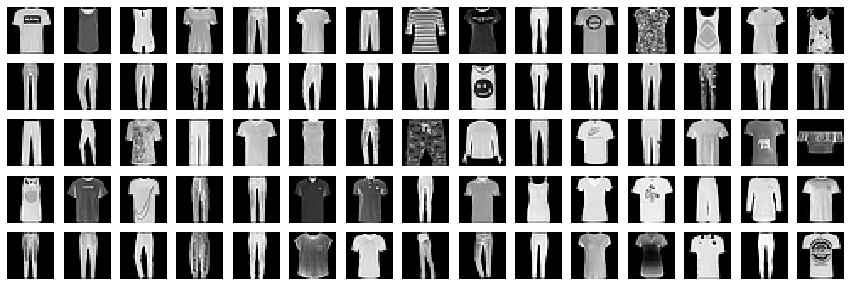

In [10]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
col2 = 15
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(X2[index2]) # index of the sample image
plt.show()

## Flatten images

In [11]:
X2=X2.reshape(X2.shape[0],-1)

**TODO 2.1.4** Print the shape of X2 after flattening

In [12]:
print(f' #classes = {y2.max()+1}, shape = {X2.shape}')

 #classes = 2, shape = (14000, 784)


## Train / test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

# 2.2 Binary classification
*  Build a model
*  Compile (use binary_crossentropy as the loss function)
*  Fit the training data, set epochs=10
*  Display training history

In [15]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
74/74 [==============================] - 4s 4ms/step - loss: 0.1418 - accuracy: 0.9587
Epoch 2/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9814
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9834
Epoch 4/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9855
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9870
Epoch 6/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9877
Epoch 7/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9892
Epoch 8/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9902
Epoch 9/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9906
Epoch 10/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9914


In [18]:
for k in hist.history:
  print(k)

loss
accuracy


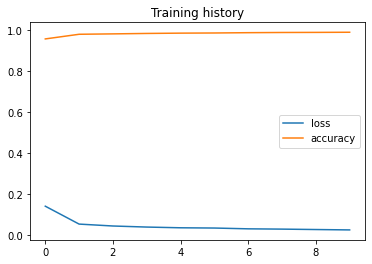

In [19]:
plt.title('Training history')
for k in hist.history:
  plt.plot(hist.history[k],label=k)
plt.legend()


## What is the performance of our classifier?



### Testing on the training set

Collect the model predictions

In [20]:
probs = model.predict(X_train)
print(probs.shape)
probs

(9380, 1)


array([[9.9893349e-01],
       [3.3114195e-10],
       [8.6208211e-06],
       ...,
       [8.1080925e-01],
       [1.4895577e-05],
       [1.3084532e-07]], dtype=float32)

We prefer a flat vector

In [21]:
# probs = model.predict(X_train)[:,0]
# probs
# or
probs=probs.flatten()
probs

array([9.9893349e-01, 3.3114195e-10, 8.6208211e-06, ..., 8.1080925e-01,
       1.4895577e-05, 1.3084532e-07], dtype=float32)

Compute labels

In [22]:
y_pred = np.where(probs>.5,1,0)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

How to check results?

In [23]:
pairs = zip(y_train,y_pred)
for i,p in enumerate(pairs):
  if i>30:break
  print(p) 

(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)


Or load it to Pandas, then it can be converted to a fully browseable data table (use the magic wand on the right)

In [24]:
pip install pandas

In [25]:
import pandas as pd
df = pd.DataFrame(zip(y_train,y_pred))
df.head(df.size)

,0,1
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
9375,1,1
9376,1,1
9377,1,1
9378,0,0


However, we need a measure - a single number describing similarity of predictions and known labels

**TODO 2.2.0** Compute this: $m=\frac{1}{n} \sum _{i=1}^n abs(y_{train}[i]-y_{pred}[i])$

In [32]:
m = 1/(len(y_pred))*(sum(np.abs(y_train-y_pred)))
print(f'm={m} 1-m={1-m}')

m=0.011727078891257995 1-m=0.988272921108742


and compute accuracy. Compare results

In [33]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_train)
print(f'accuracy={acc}')

accuracy=0.988272921108742


Compute the **confusion matrix**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_train, y_pred)
matrix

array([[4676,    4],
       [ 106, 4594]])

Useful function (small adaptation)

In [35]:
import seaborn as sns
from sklearn import metrics

LABELS= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS[0:num_classes],
                yticklabels=LABELS[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [36]:
y_pred = np.where(probs>.5,1,0)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

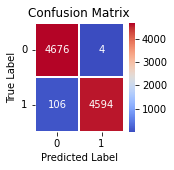

In [37]:
show_confusion_matrix(y_train, y_pred, 2)

In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4680
           1       1.00      0.98      0.99      4700

    accuracy                           0.99      9380
   macro avg       0.99      0.99      0.99      9380
weighted avg       0.99      0.99      0.99      9380



Exact formuls for classification scores are given [here (in Polish) silde 14 and following](https://home.agh.edu.pl/~pszwed/wiki/lib/exe/fetch.php?media=med:med-w04.pdf)

### Validation on the test set

**TODO 2.2.1** Repat the steps above on the test set. Replace X_train by X_test, etc.

In [39]:
probs = model.predict(X_test)
probs=probs.flatten()
y_pred = np.where(probs>.5,1,0)
m = 1/(len(y_pred))*(sum(np.abs(y_test-y_pred)))
print(f'm={m} 1-m={1-m}')


m=0.014502164502164502 1-m=0.9854978354978355


In [41]:
acc=accuracy_score(y_pred,y_test)
print(f'accuracy={acc}')

accuracy=0.9854978354978355


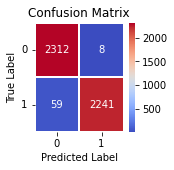

In [42]:
show_confusion_matrix(y_test, y_pred, 2)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2320
           1       1.00      0.97      0.99      2300

    accuracy                           0.99      4620
   macro avg       0.99      0.99      0.99      4620
weighted avg       0.99      0.99      0.99      4620



**TODO 2.2.2** supply X_test, y_test as validation data, fit the model and display plots

Epoch 1/10
74/74 [==============================] - 1s 9ms/step - loss: 0.0247 - accuracy: 0.9905 - val_loss: 0.0439 - val_accuracy: 0.9842
Epoch 2/10
74/74 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 3/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0438 - val_accuracy: 0.9851
Epoch 4/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 5/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 6/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0268 - val_accuracy: 0.9920
Epoch 7/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 8/10
74/74 [==

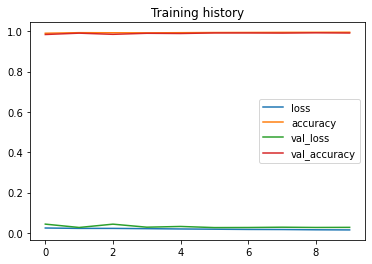

In [44]:
hist = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))
plt.title('Training history')
for k in hist.history:
  plt.plot(hist.history[k],label=k)
plt.legend()

#2.3 Binary classification on brest cancer dataset

The information on the dataset can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [45]:
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**TODO 2.3.1** Repeat the previous steps for to process the loaded data
*  Create a model
*  fit it setting epochs=100 and supplying validation data
*  plot training history
*  obtain predictions
*  display confussion matrix
*  and print the classification report

**Caveat** we seed everything possible to create reproducible results

In [46]:
import os
import random
def set_seeds(seed=1):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

set_seeds(42)

In [47]:
import tensorflow as tf
from keras import models
from keras import layers
tf.random.set_seed(1)

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
# use loss='binary_crossentropy'
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [50]:
# epochs=100, batch_size=y_train.shape[0], use validation data
hist = model.fit(X_train,y_train,epochs=100,batch_size=y_train.shape[0], validation_data=((X_test,y_test)))


Epoch 1/100
1/1 [==============================] - 1s 819ms/step - loss: 14.9673 - accuracy: 0.6194 - val_loss: 12.5453 - val_accuracy: 0.6436
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 13.5381 - accuracy: 0.6194 - val_loss: 11.0121 - val_accuracy: 0.6436
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 11.8343 - accuracy: 0.6194 - val_loss: 9.3134 - val_accuracy: 0.6436
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 10.0507 - accuracy: 0.6194 - val_loss: 7.7557 - val_accuracy: 0.6489
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 8.4008 - accuracy: 0.6220 - val_loss: 6.3407 - val_accuracy: 0.6489
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 6.9155 - accuracy: 0.6220 - val_loss: 5.0138 - val_accuracy: 0.6436
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 5.5289 - accuracy: 0.6273 - val_loss: 3.8092 - val_accuracy: 0.6489
Epoch 8/100
1

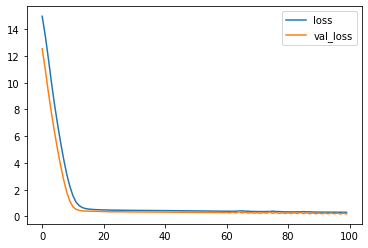

In [51]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

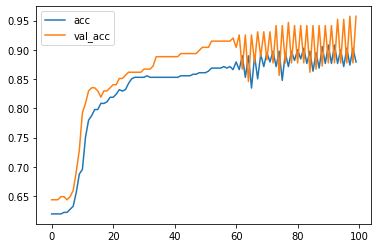

In [52]:
plt.plot(hist.history['accuracy'],label='acc')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.legend()

In [55]:
probs = model.predict(X_train).flatten()
y_pred = np.where(probs>.5,1,0)
m = 1/(len(y_pred))*(sum(np.abs(y_train-y_pred)))
print(f'm={m} 1-m={1-m}')


m=0.09711286089238845 1-m=0.9028871391076115


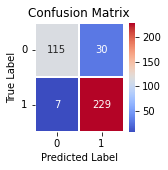

In [57]:
show_confusion_matrix(y_train, y_pred, 2)

In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       145
           1       0.88      0.97      0.93       236

    accuracy                           0.90       381
   macro avg       0.91      0.88      0.89       381
weighted avg       0.91      0.90      0.90       381



# 2.4 Model \#output neurons = \#classes

We reload Fashion MNIST data... This may be skipped

In [59]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
# X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=X/255

X2 = X[(y==0) | (y==1)]
y2=y[(y==0) | (y==1)]
X2=X2.reshape(X2.shape[0],-1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

We create a neural net with two neurons in the output layer and softmax activation function. As the loss, sparse_categorical_crossentropy is used,
$\sum_{i=1}^k y_i\cdot ln(p_i)$ 

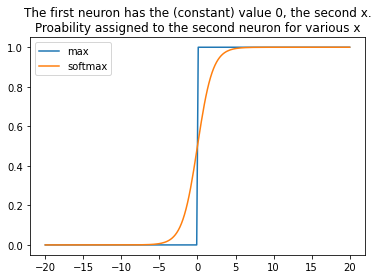

In [61]:
# softmax slects a neuron with the highest probability value
# but it is smooth and differentiable


x=np.linspace(-20,20,200)
zeros = x*0
X=np.stack((zeros,x),axis=-1)

plt.title("The first neuron has the (constant) value 0, the second x.\nProability assigned to the second neuron for various x")
plt.plot(x,np.argmax(X,axis=1),label='max')
plt.plot(x,np.exp(X[:,1])/((np.exp(X[:,0])+np.exp(X[:,1]))),label='softmax')
plt.legend()


In [62]:
from keras import models
from keras import layers


num_classes = y_train.max()+1

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(num_classes, activation='softmax'))
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
hist = network.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
74/74 [==============================] - 1s 4ms/step - loss: 0.1151 - accuracy: 0.9509
Epoch 2/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0500 - accuracy: 0.9823
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9856
Epoch 4/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9878
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9903
Epoch 6/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9919
Epoch 7/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 0.9924
Epoch 8/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9930
Epoch 9/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9931
Epoch 10/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9959


Get output probabilities

In [64]:
probs = network.predict(X_test)

And load them to a data frame

In [65]:
import pandas as pd

df = pd.DataFrame(probs)
df.head(df.size)

,0,1
0,1.000000e+00,5.165700e-22
1,1.000000e+00,4.329910e-13
2,7.342873e-12,1.000000e+00
3,1.000000e+00,2.186204e-28
4,2.458934e-13,1.000000e+00
...,...,...
4615,1.564117e-10,1.000000e+00
4616,1.593371e-13,1.000000e+00
4617,8.021079e-08,9.999999e-01
4618,1.000000e+00,6.985570e-17


Determine predicted labels as arg_max (computed horizontally)

In [66]:
y_pred = np.argmax(probs,axis=1)

Display confusion matrix and classification report

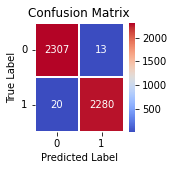

In [67]:
show_confusion_matrix(y_test, y_pred, 2)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2320
           1       0.99      0.99      0.99      2300

    accuracy                           0.99      4620
   macro avg       0.99      0.99      0.99      4620
weighted avg       0.99      0.99      0.99      4620



# 2.5 Build a model for all ten fashion classes

In [69]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);

X=X/255

X=X.reshape(X.shape[0],-1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**TODO 2.5.1** Use the same model configuration, but adapt it to appropriate number of classes

In [77]:
from keras import models
from keras import layers


num_classes = y_train.max()+1
# create a model add layers, compile
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(num_classes, activation='softmax'))
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fit the model

In [78]:
hist = network.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
367/367 [==============================] - 2s 4ms/step - loss: 0.6068 - accuracy: 0.7836
Epoch 2/10
367/367 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8491
Epoch 3/10
367/367 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8650
Epoch 4/10
367/367 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8755
Epoch 5/10
367/367 [==============================] - 1s 4ms/step - loss: 0.3154 - accuracy: 0.8836
Epoch 6/10
367/367 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.8889
Epoch 7/10
367/367 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.8940
Epoch 8/10
367/367 [==============================] - 1s 4ms/step - loss: 0.2710 - accuracy: 0.8998
Epoch 9/10
367/367 [==============================] - 1s 4ms/step - loss: 0.2609 - accuracy: 0.9027
Epoch 10/10
367/367 [==============================] - 1s 4ms/step - loss: 0.2510 - accuracy: 0.9064

Make predictions

In [79]:
probs = network.predict(X_test)
print(f'Probs shape={probs.shape}')
y_pred = np.argmax(probs,axis=1)

Probs shape=(23100, 10)


Show confusion matrix and scores (classification report)

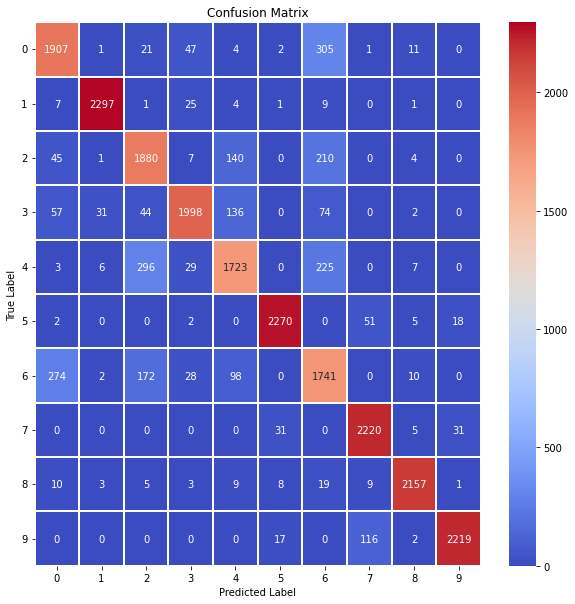

In [81]:
show_confusion_matrix(y_test, y_pred, 10)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2299
           1       0.98      0.98      0.98      2345
           2       0.78      0.82      0.80      2287
           3       0.93      0.85      0.89      2342
           4       0.82      0.75      0.78      2289
           5       0.97      0.97      0.97      2348
           6       0.67      0.75      0.71      2325
           7       0.93      0.97      0.95      2287
           8       0.98      0.97      0.97      2224
           9       0.98      0.94      0.96      2354

    accuracy                           0.88     23100
   macro avg       0.89      0.88      0.88     23100
weighted avg       0.89      0.88      0.88     23100



**TODO 2.5.2** Analyze the results. Which fashion classes are wrongly classified. Can you explain that by similarity of forms?


# 2.6 Analyze the iris dataset

You can find the dataset description [here](https://archive.ics.uci.edu/ml/datasets/iris)

**TODO 2.6.1** Implement the following steps
*  First load  data (code provided)
*  Create a neural network comprising one hidden layer with 4 units
*  Experimentaly establish the number of epochs during training. 
*  Provide validation data
*  Display loss/validation loss and accuracies
*  Predict output labels
*  Display the confussion matrix and scores 

In [83]:
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
# Build the model

from keras import models
from keras import layers

num_classes = y_train.max()+1

network = models.Sequential()
network.add(layers.Dense(4, activation='relu', input_shape=(4,)))
network.add(layers.Dense(num_classes, activation='softmax'))
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [105]:
#train

hist = network.fit(X_train,y_train,epochs=500,batch_size=y_train.shape[0], validation_data=(X_test,y_test))

Epoch 1/500
1/1 [==============================] - 1s 602ms/step - loss: 2.1266 - accuracy: 0.0000e+00 - val_loss: 2.1690 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 35ms/step - loss: 2.0788 - accuracy: 0.0000e+00 - val_loss: 2.1465 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 2.0476 - accuracy: 0.0000e+00 - val_loss: 2.1292 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 32ms/step - loss: 2.0235 - accuracy: 0.0000e+00 - val_loss: 2.1148 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 38ms/step - loss: 2.0035 - accuracy: 0.0000e+00 - val_loss: 2.1025 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 31ms/step - loss: 1.9862 - accuracy: 0.0000e+00 - val_loss: 2.0917 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 1.9710 - accuracy: 0.0000e+00 - val_los

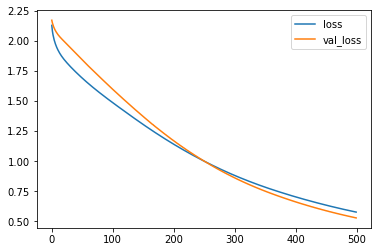

In [106]:
#plot loss
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

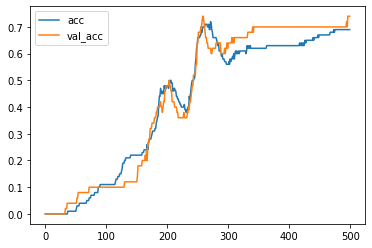

In [107]:
#Plot accuracy
plt.plot(hist.history['accuracy'],label='acc')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.legend()

In [108]:
# Make predictions
probs = network.predict(X_test)
print(f'Probs shape={probs.shape}')
y_pred = np.argmax(probs,axis=1)

Probs shape=(50, 3)


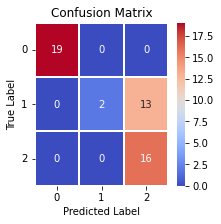

In [109]:
# Confussion matrix
show_confusion_matrix(y_test, y_pred, 3)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.13      0.24        15
           2       0.55      1.00      0.71        16

    accuracy                           0.74        50
   macro avg       0.85      0.71      0.65        50
weighted avg       0.86      0.74      0.68        50



In [111]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  

In [112]:
!pip install -U nbconvert

     |████████████████████████████████| 558 kB 4.3 MB/s 
     |████████████████████████████████| 130 kB 33.2 MB/s 
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


In [113]:
!jupyter nbconvert --to pdf lab_ED_Bike_Sharing_Dataset.ipynb

[NbConvertApp] WARNING | pattern 'lab_ED_Bike_Sharing_Dataset.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru